In [4]:
import pandas as pd 
import numpy as np

In [5]:
data = pd.read_csv('E:/Python Workshop/Datasets/googleplaystore.csv')

In [6]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data.Installs = data.Installs.apply(lambda x : x.strip('+'))
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.replace('Free',np.nan)


In [8]:
data.Installs.value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [9]:
data.Type = data.Type.replace('Free','0')
data.Type = data.Type.replace('Paid','1')

In [10]:
data.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
0,10040,10040,8720,10040,10040,10039,10040,10039,10040,10040,10034,10038
1,800,800,647,800,800,800,800,800,800,800,798,799


In [11]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [23]:
import seaborn as sb
import matplotlib.pyplot as plt

In [24]:
data['Content Rating'].nunique()

6

In [25]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,0,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [35]:
dataList = data['Content Rating'].value_counts()
keysList = list(data['Content Rating'].unique())
len(keysList)
print(keysList)
keysList.pop()
print(keysList)

['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated', nan]
['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']


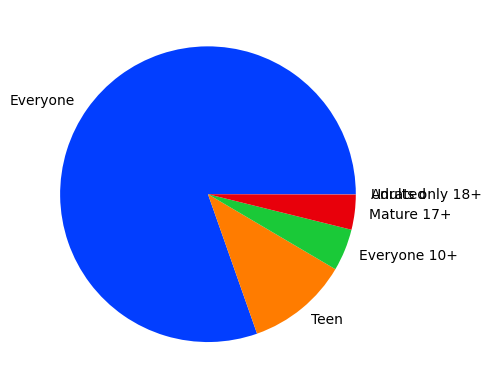

In [42]:
palette_color = sb.color_palette('bright') 
  
plt.pie(dataList,labels=keysList,colors= palette_color)
plt.show()

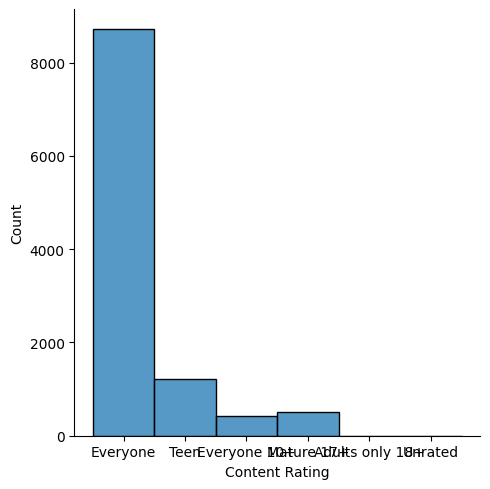

In [39]:

sb.displot(data['Content Rating'])
  

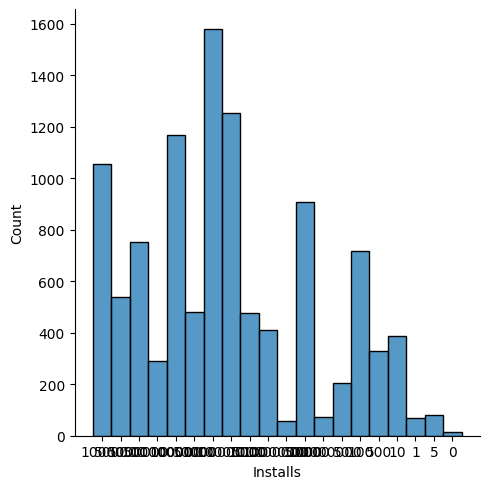

In [43]:
sb.displot(data['Installs'])